<a href="https://colab.research.google.com/github/batuhan6/Medical-Insurance-Premium-Prediction/blob/main/Medical_Insurance_Premium_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORT LIBRARIES AND DATASETS

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!pip install plotly
!pip install jupyterthemes

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)
# setting the style of the notebook to be monokai theme
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.1 MB/s eta 0:00:00


In [5]:
# read the csv file
insurance_df =  pd.read_csv('/content/gdrive/My Drive/insurance.csv')

In [6]:
insurance_df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [7]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## PERFORM EXPLORATORY DATA ANALYSIS

In [8]:
insurance_df.isnull()

,age,sex,bmi,children,smoker,region,expenses
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [11]:
# check if there are any Null values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

<Axes: >

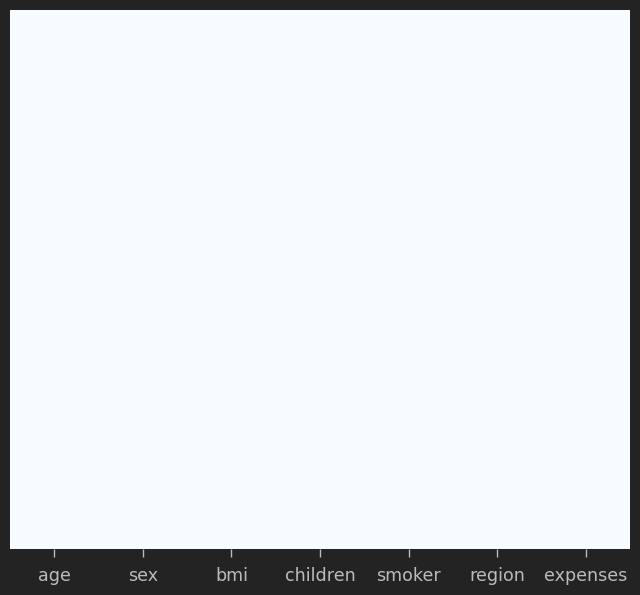

In [12]:
# check if there are any Null values
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [13]:
# Check the dataframe info
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
insurance_df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [15]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index
df_region = df_region = insurance_df.groupby('region').mean('age,''bmi', 'children', 'expenses')

df_region

,age,bmi,children,expenses
region,,,,
northeast,39.268519,29.176235,1.046296,13406.384691
northwest,39.196923,29.201846,1.147692,12417.575169
southeast,38.939560,33.359341,1.049451,14735.411538
southwest,39.455385,30.596615,1.141538,12346.937908


In [16]:
# Grouping data by 'age' and examining the relationship between 'age' and 'charges'
df_age = insurance_df.groupby(by='age').mean('bmi','children', 'expenses')
df_age

,bmi,children,expenses
age,,,
18,31.333333,0.449275,7086.217971
19,28.598529,0.426471,9747.909706
20,30.627586,0.862069,10159.697931
21,28.189286,0.785714,4730.464286
22,31.092857,0.714286,10012.932857
23,31.460714,1.000000,12419.820357
24,29.142857,0.464286,10648.015714
25,29.689286,1.285714,9838.365000
26,29.435714,1.071429,6133.825714


## PERFORM FEATURE ENGINEERING

In [17]:
# Check unique values in the 'sex' column
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [18]:
# convert categorical variable to numerical
insurance_df['sex'] = insurance_df['sex'].apply(lambda x:0 if x == 'female' else 1)

In [19]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [20]:
# Check the unique values in the 'smoker' column
insurance_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [21]:
# Convert categorical variable to numerical
insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [22]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [23]:
# Check unique values in 'region' column
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [24]:
region_dummies = pd.get_dummies(insurance_df['region'], drop_first = True).astype(int)


In [25]:
region_dummies

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [26]:
insurance_df = pd.concat([insurance_df, region_dummies], axis = 1)

In [27]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,expenses,northwest,southeast,southwest
0,19,0,27.9,0,1,southwest,16884.92,0,0,1
1,18,1,33.8,1,0,southeast,1725.55,0,1,0
2,28,1,33.0,3,0,southeast,4449.46,0,1,0
3,33,1,22.7,0,0,northwest,21984.47,1,0,0
4,32,1,28.9,0,0,northwest,3866.86,1,0,0


In [28]:
# Let's drop the original 'region' column
insurance_df.drop(['region'], axis = 1, inplace = True)


In [29]:
insurance_df.head()

,age,sex,bmi,children,smoker,expenses,northwest,southeast,southwest
0,19,0,27.9,0,1,16884.92,0,0,1
1,18,1,33.8,1,0,1725.55,0,1,0
2,28,1,33.0,3,0,4449.46,0,1,0
3,33,1,22.7,0,0,21984.47,1,0,0
4,32,1,28.9,0,0,3866.86,1,0,0


## PERFORM DATA VISUALIZATION

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'expenses'}>]], dtype=object)

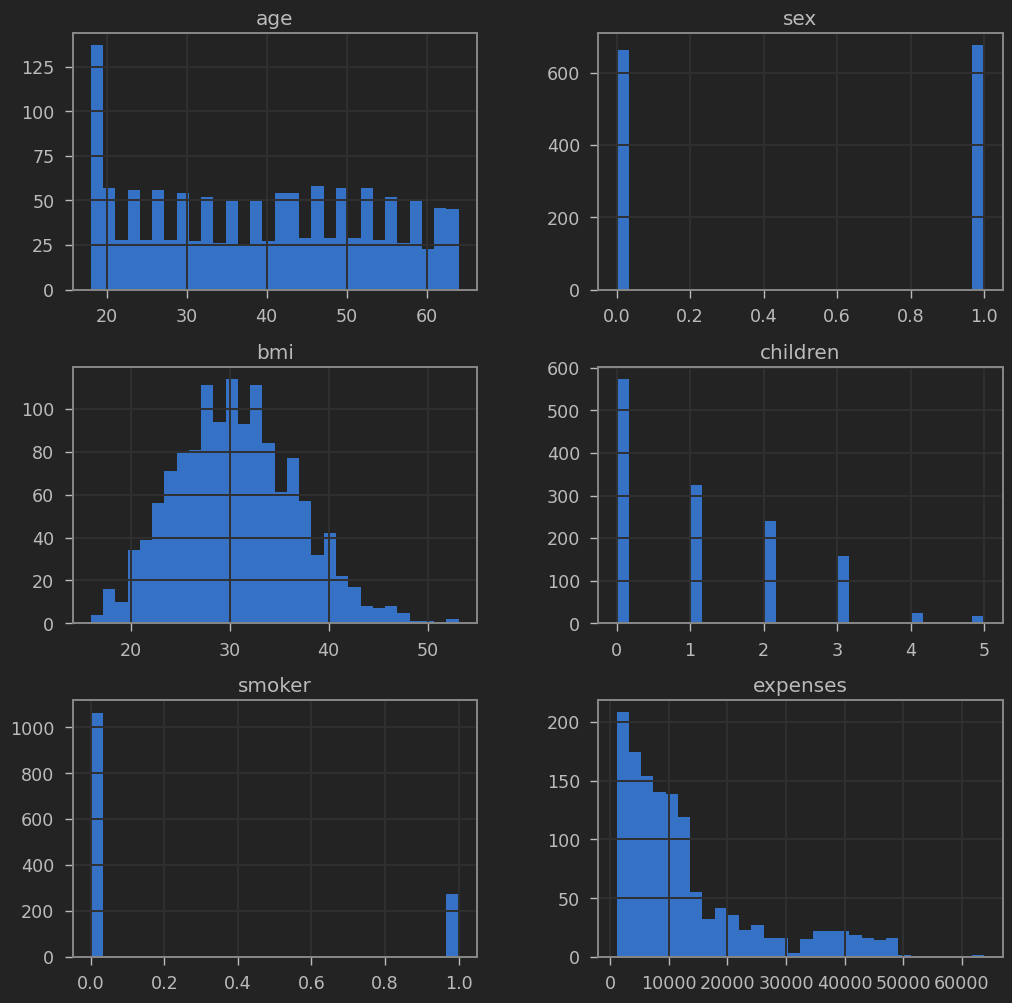

In [30]:
insurance_df[['age','sex','bmi','children','smoker','expenses']].hist(bins=30,figsize=(12,12))

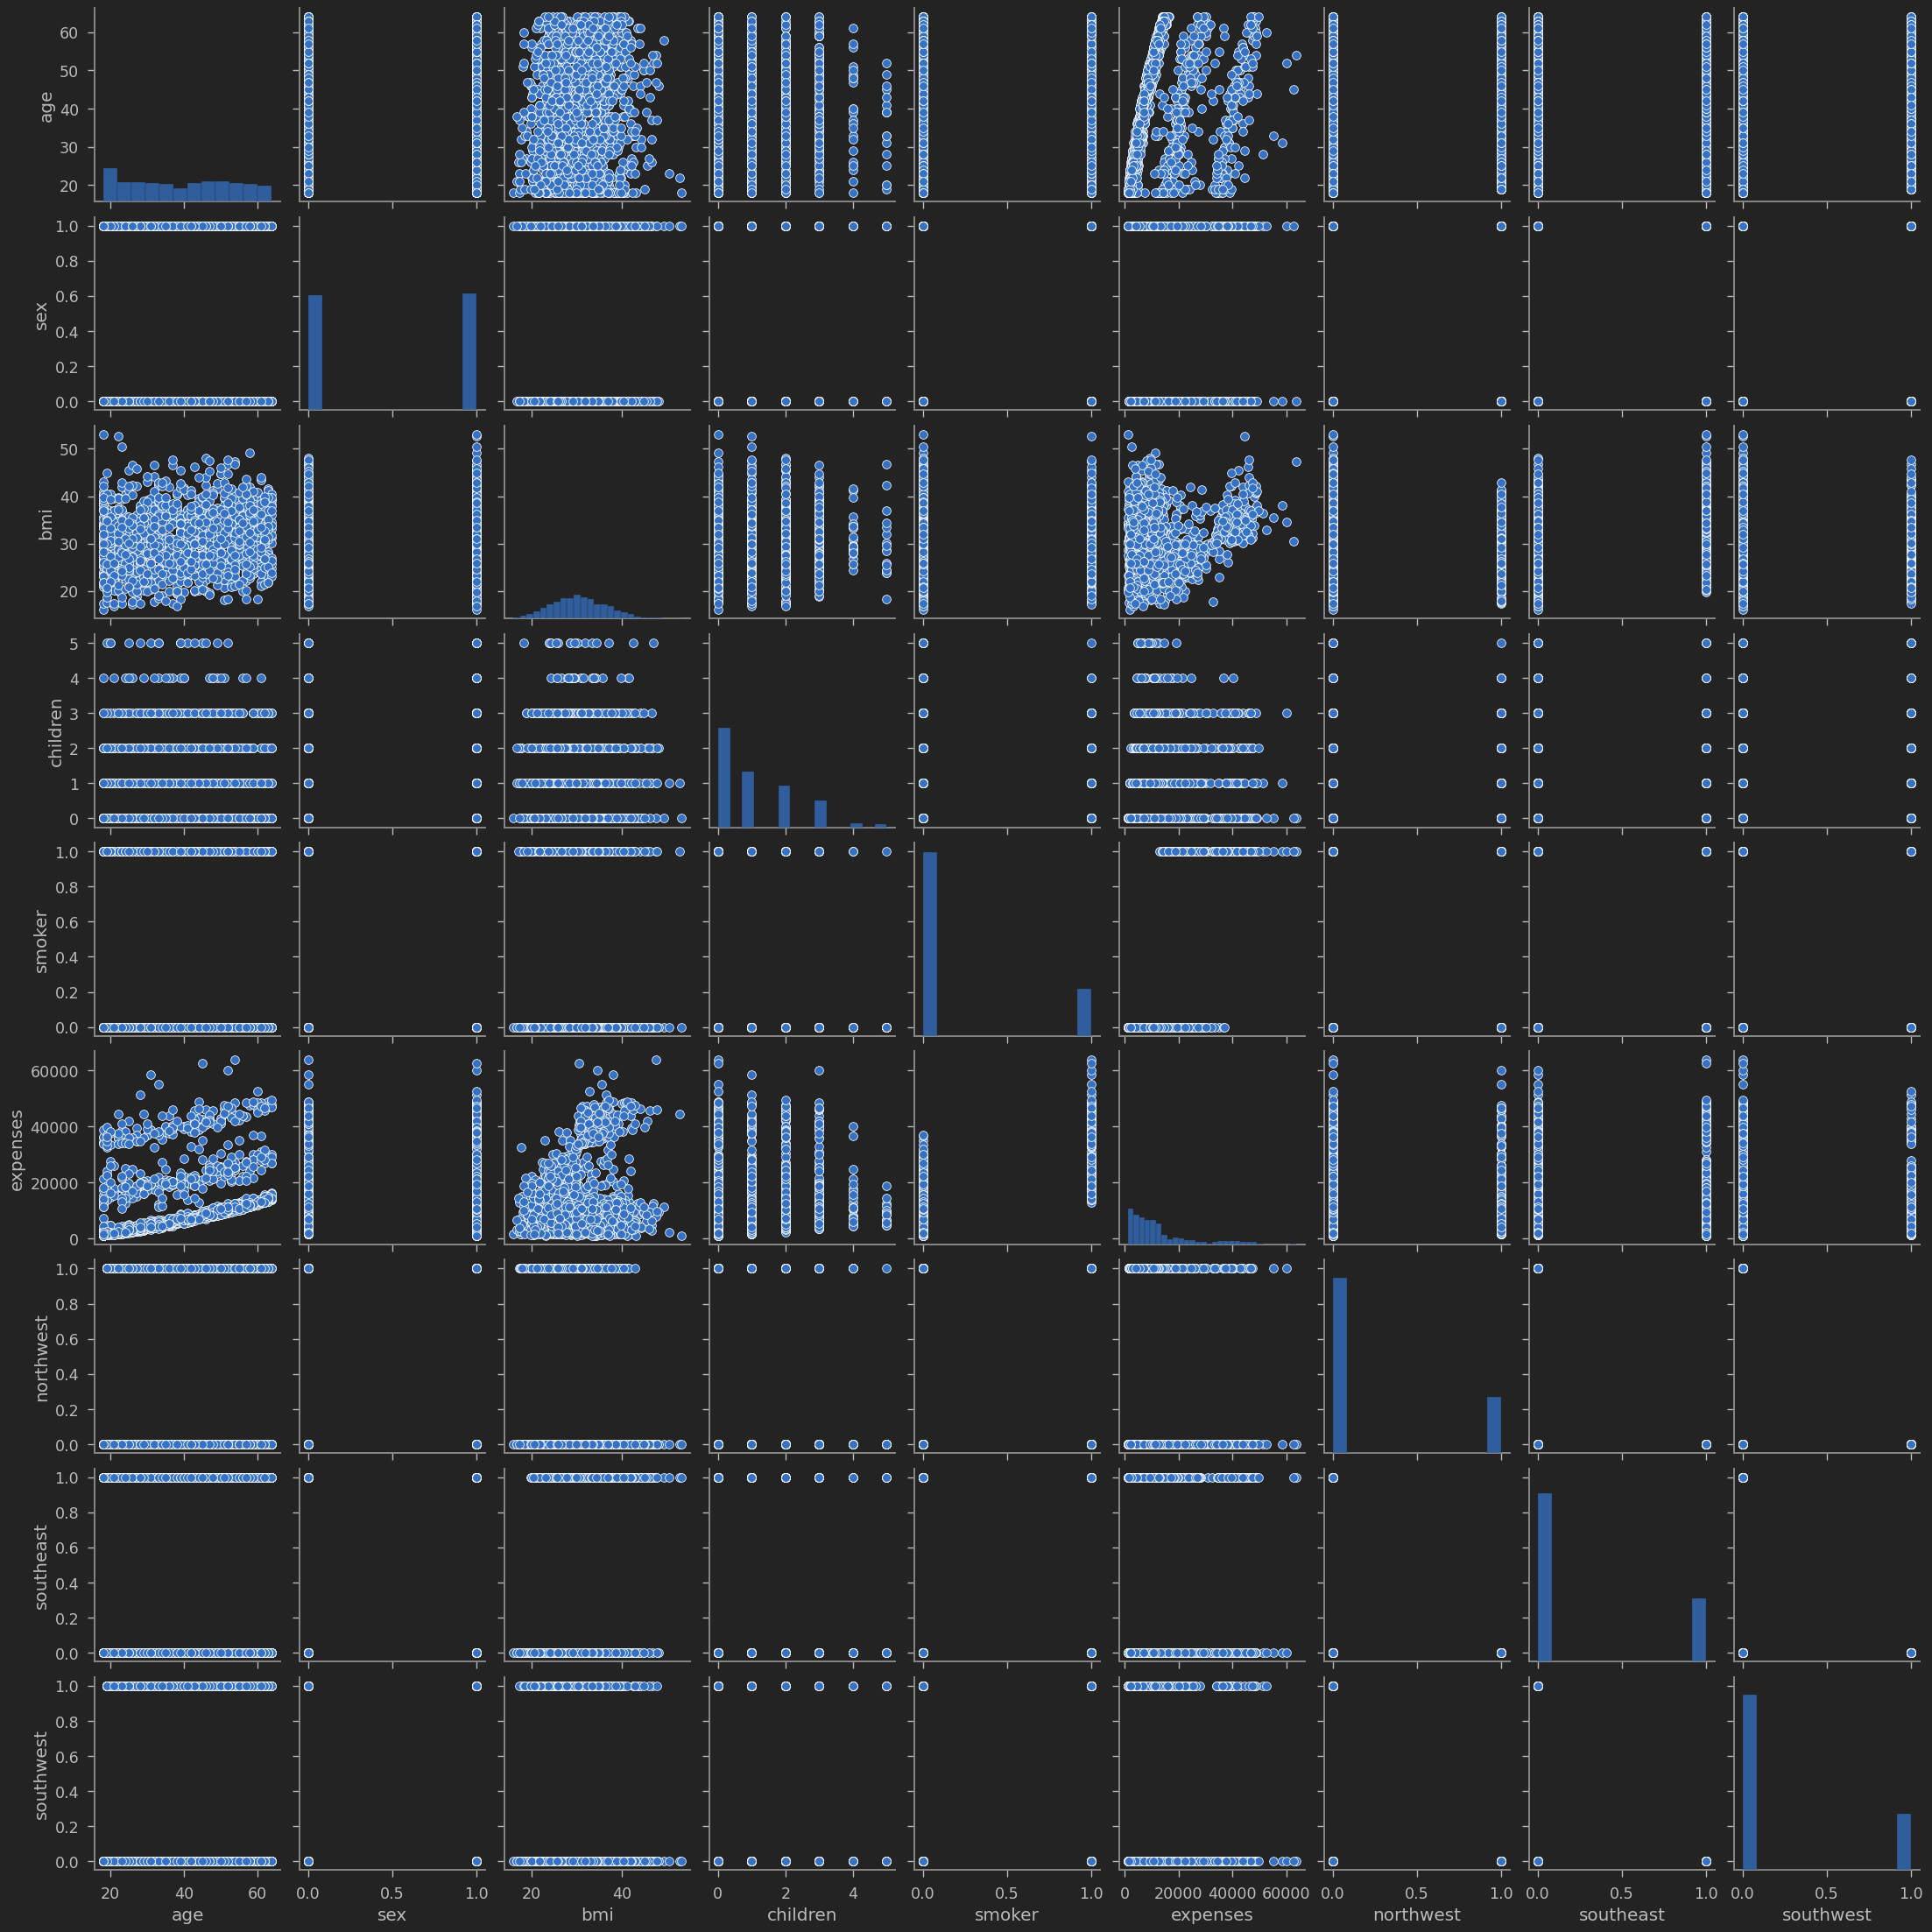

In [31]:
# plot pairplot
sns.pairplot(insurance_df)


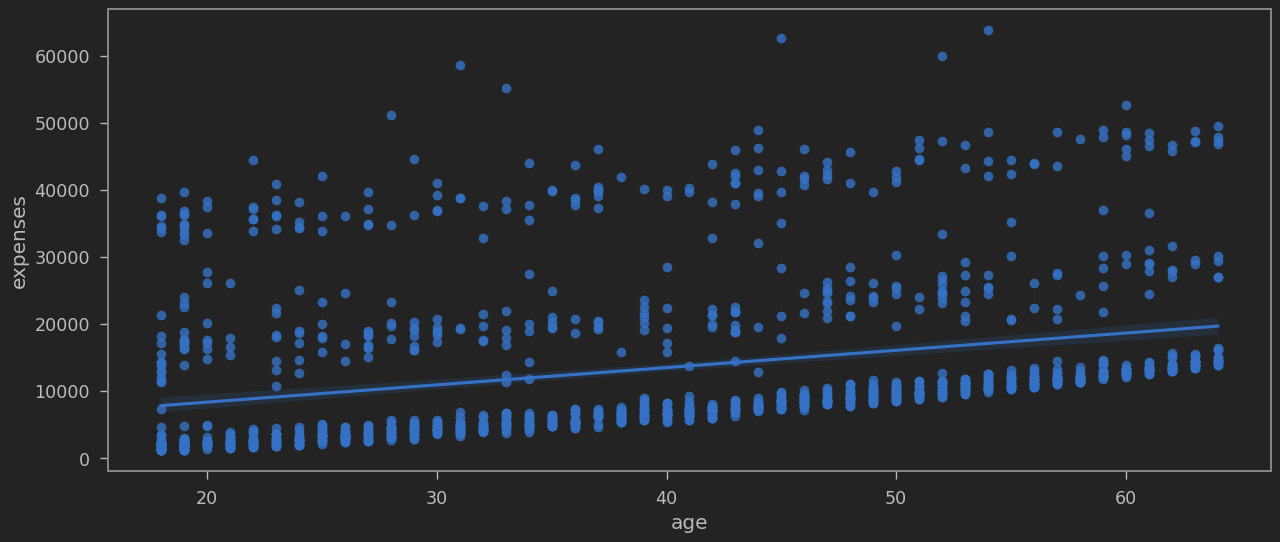

In [32]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'expenses', data = insurance_df)
plt.show()


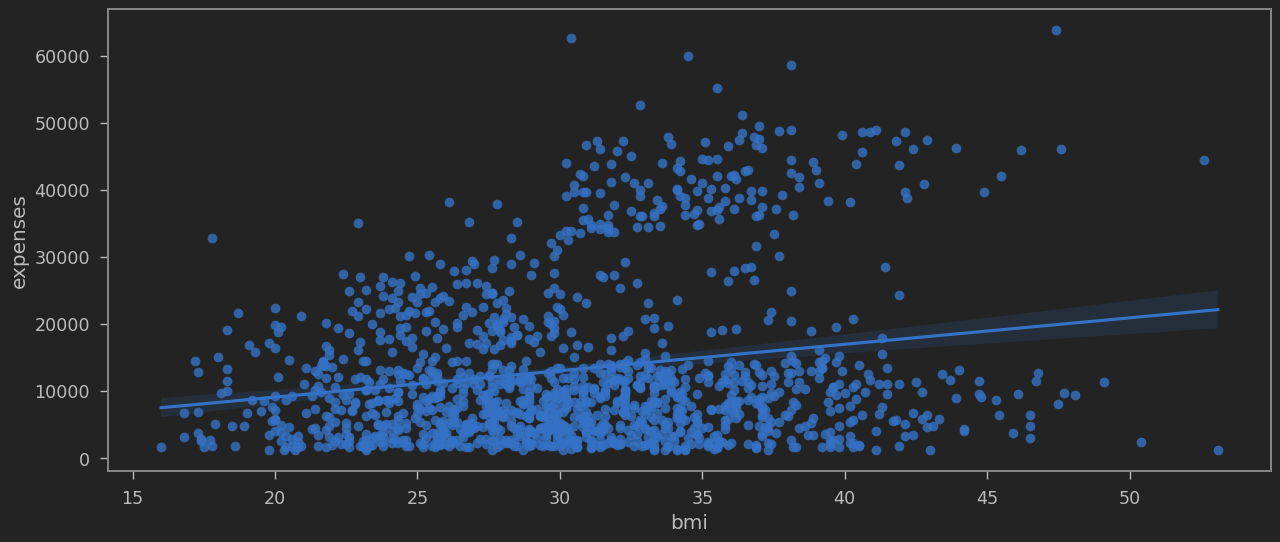

In [33]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'expenses', data = insurance_df)
plt.show()


In [34]:
insurance_df.corr()

,age,sex,bmi,children,smoker,expenses,northwest,southeast,southwest
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,0.198576,-0.135992,0.270144,-0.006398
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
northwest,-0.000407,-0.011156,-0.135992,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270144,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006398,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


<Axes: >

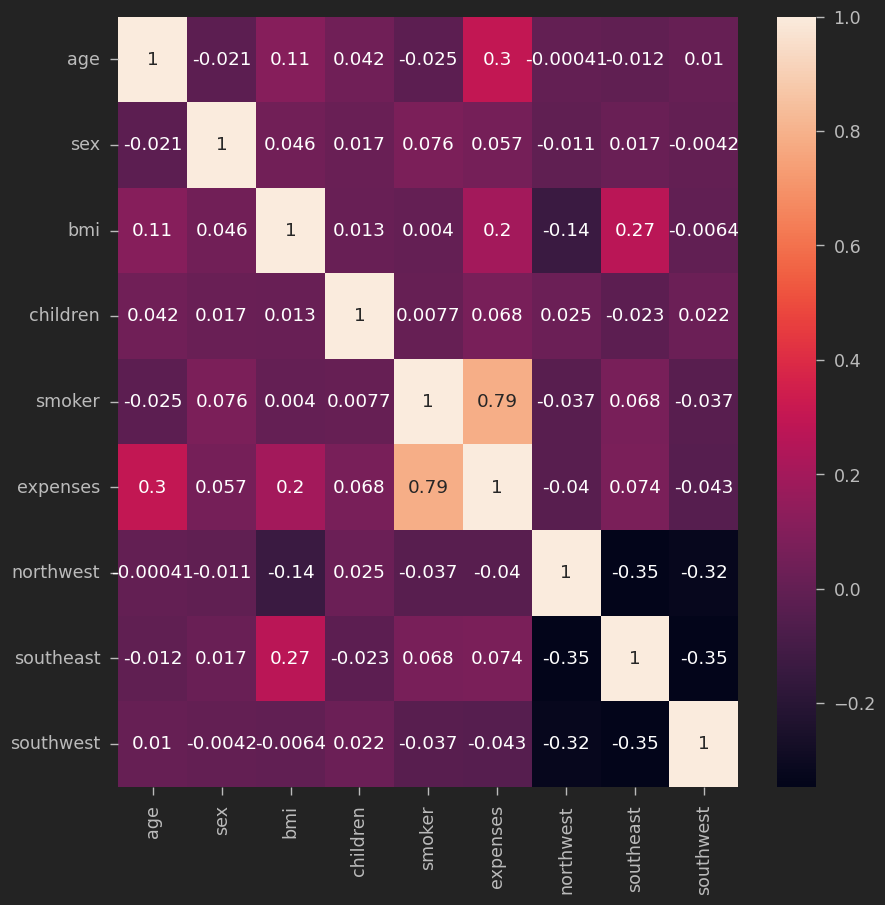

In [35]:
# Calculate and plote correlation matrix.
plt.figure(figsize = (10,10))
sns.heatmap(insurance_df.corr(), annot=True)


## CREATE TRAINING AND TESTING DATASET

In [36]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'expenses', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [37]:
X = insurance_df.drop(columns = ['expenses'])
y = insurance_df['expenses']

In [38]:
X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.9,0,1,0,0,1
1,18,1,33.8,1,0,0,1,0
2,28,1,33.0,3,0,0,1,0
3,33,1,22.7,0,0,1,0,0
4,32,1,28.9,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,0,0
1334,18,0,31.9,0,0,0,0,0
1335,18,0,36.9,0,0,0,1,0
1336,21,0,25.8,0,0,0,0,1


In [39]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [40]:
X.shape

(1338, 8)

In [41]:
y.shape

(1338,)

In [42]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [43]:
y = y.reshape(-1,1)

In [44]:
# Only take the numerical variables and scale them
X

array([[19. ,  0. , 27.9, ...,  0. ,  0. ,  1. ],
       [18. ,  1. , 33.8, ...,  0. ,  1. ,  0. ],
       [28. ,  1. , 33. , ...,  0. ,  1. ,  0. ],
       ...,
       [18. ,  0. , 36.9, ...,  0. ,  1. ,  0. ],
       [21. ,  0. , 25.8, ...,  0. ,  0. ,  1. ],
       [61. ,  0. , 29.1, ...,  1. ,  0. ,  0. ]], dtype=float32)

In [45]:
y.shape

(1338, 1)

In [46]:
#scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)


In [47]:
# Split the data into 20% Testing and 80% Training

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
print(X_train.shape)
print(X_test.shape)

(1070, 8)
(268, 8)


## TRAIN AND EVALUATE A LINEAR REGRESSION MODEL IN SCIKIT-LEARN

In [48]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regression_model_sklearn = LinearRegression()
regression_model_sklearn.fit(X_train, y_train)

LinearRegression()

In [49]:
regression_model_sklearn_accuracy = regression_model_sklearn.score(X_test, y_test)
regression_model_sklearn_accuracy

0.6954555385215657

In [50]:
y_predict = regression_model_sklearn.predict(X_test)

In [51]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)


In [52]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [53]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt


RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 6535.486 
MSE = 42712572.0 
MAE = 4553.4805 
R2 = 0.6954555675394997 
Adjusted R2 = 0.686048789702882


## TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK-BASED REGRESSION MODEL

In [54]:
!pip install tensorflow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [55]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 activation_1 (Activation)   (None, 150)               0         
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 activation_2 (Activation)   (None, 150)               0

In [56]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
43/43 [==============================] - 9s 43ms/step - loss: 0.7417 - val_loss: 0.2706
Epoch 2/100
43/43 [==============================] - 1s 16ms/step - loss: 0.4035 - val_loss: 0.2079
Epoch 3/100
43/43 [==============================] - 1s 13ms/step - loss: 0.3032 - val_loss: 0.1908
Epoch 4/100
43/43 [==============================] - 1s 13ms/step - loss: 0.2942 - val_loss: 0.1703
Epoch 5/100
43/43 [==============================] - 1s 13ms/step - loss: 0.2456 - val_loss: 0.1737
Epoch 6/100
43/43 [==============================] - 1s 13ms/step - loss: 0.2574 - val_loss: 0.1765
Epoch 7/100
43/43 [==============================] - 0s 11ms/step - loss: 0.2180 - val_loss: 0.1628
Epoch 8/100
43/43 [==============================] - 1s 12ms/step - loss: 0.2335 - val_loss: 0.1765
Epoch 9/100
43/43 [==============================] - 0s 9ms/step - loss: 0.2144 - val_loss: 0.1895
Epoch 10/100
43/43 [==============================] - 0s 8ms/step - loss: 0.2106 - val_loss: 0.1801
E

In [57]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

9/9 [==============================] - 0s 2ms/step - loss: 0.2127
Accuracy : 0.7872680276632309


In [58]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

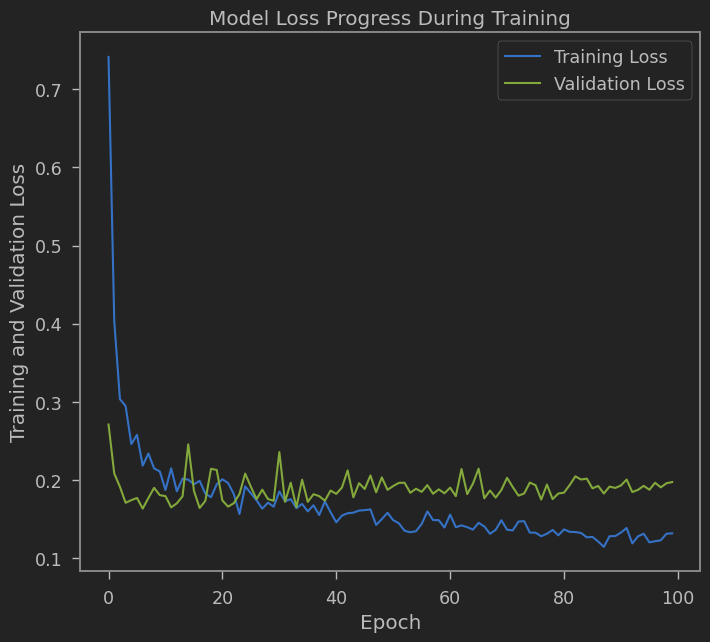

In [59]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

9/9 [==============================] - 0s 2ms/step


Text(0, 0.5, 'True Values')

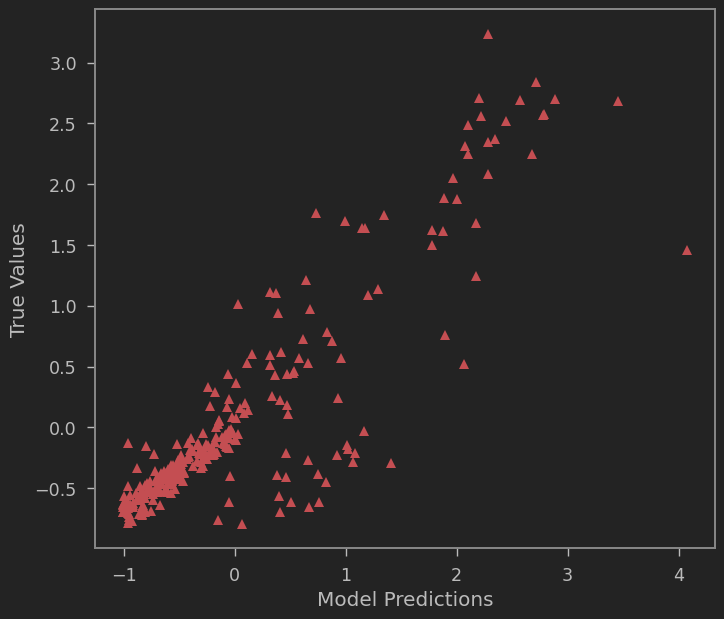

In [60]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [61]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

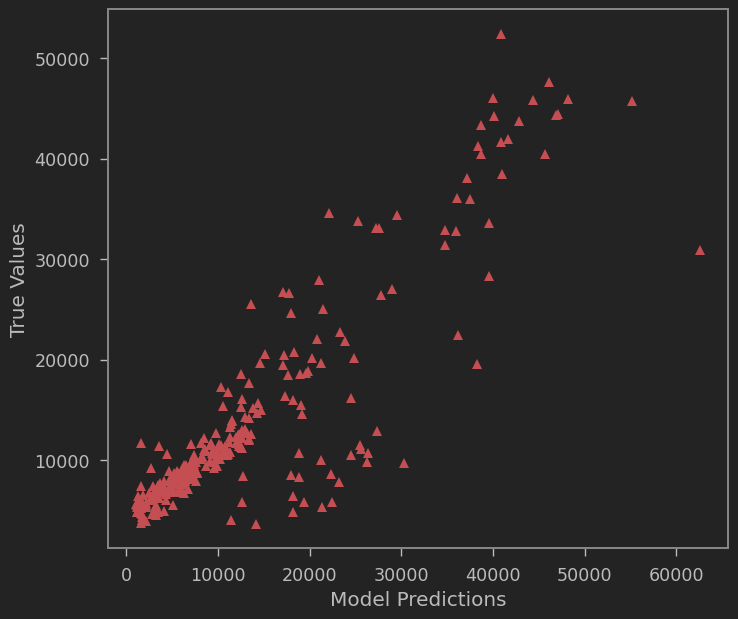

In [62]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [63]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 5583.398 
MSE = 31174334.0 
MAE = 3731.2695 
R2 = 0.7777242378983747 
Adjusted R2 = 0.7708585772929191
